In [5]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import shapiro, levene

# Load the dataset again
file_path = 'cleaned_data_shakir.csv'
data = pd.read_csv(file_path)


combined_data = data.groupby(['participant', 'session']).agg(
    combined_mean_reaction_time=('reactionTime', 'mean'),
    combined_accuracy=('keyResponseCorrect', 'mean')
).reset_index()


# Normality test for combined reaction time and accuracy for each session type
normality_tests = {}
for session_type in combined_data['session'].unique():
    session_data = combined_data[combined_data['session'] == session_type]
    normality_tests[session_type] = {
        'reaction_time': shapiro(session_data['combined_mean_reaction_time'].dropna()),
        'accuracy': shapiro(session_data['combined_accuracy'].dropna())
    }

normality_tests, combined_data.head()


({'brown': {'reaction_time': ShapiroResult(statistic=0.9688854813575745, pvalue=0.8806341886520386),
   'accuracy': ShapiroResult(statistic=0.8131059408187866, pvalue=0.009797077625989914)},
  'pink': {'reaction_time': ShapiroResult(statistic=0.9517627358436584, pvalue=0.6252250075340271),
   'accuracy': ShapiroResult(statistic=0.8216274976730347, pvalue=0.012461034581065178)},
  'silence': {'reaction_time': ShapiroResult(statistic=0.9231560826301575, pvalue=0.27660563588142395),
   'accuracy': ShapiroResult(statistic=0.9239858388900757, pvalue=0.28376683592796326)}},
    participant  session  combined_mean_reaction_time  combined_accuracy
 0          200    brown                     0.597322           0.989583
 1          200     pink                     0.663236           0.895833
 2          200  silence                     0.689830           0.906250
 3          201    brown                     0.575296           0.989583
 4          201     pink                     0.626294       

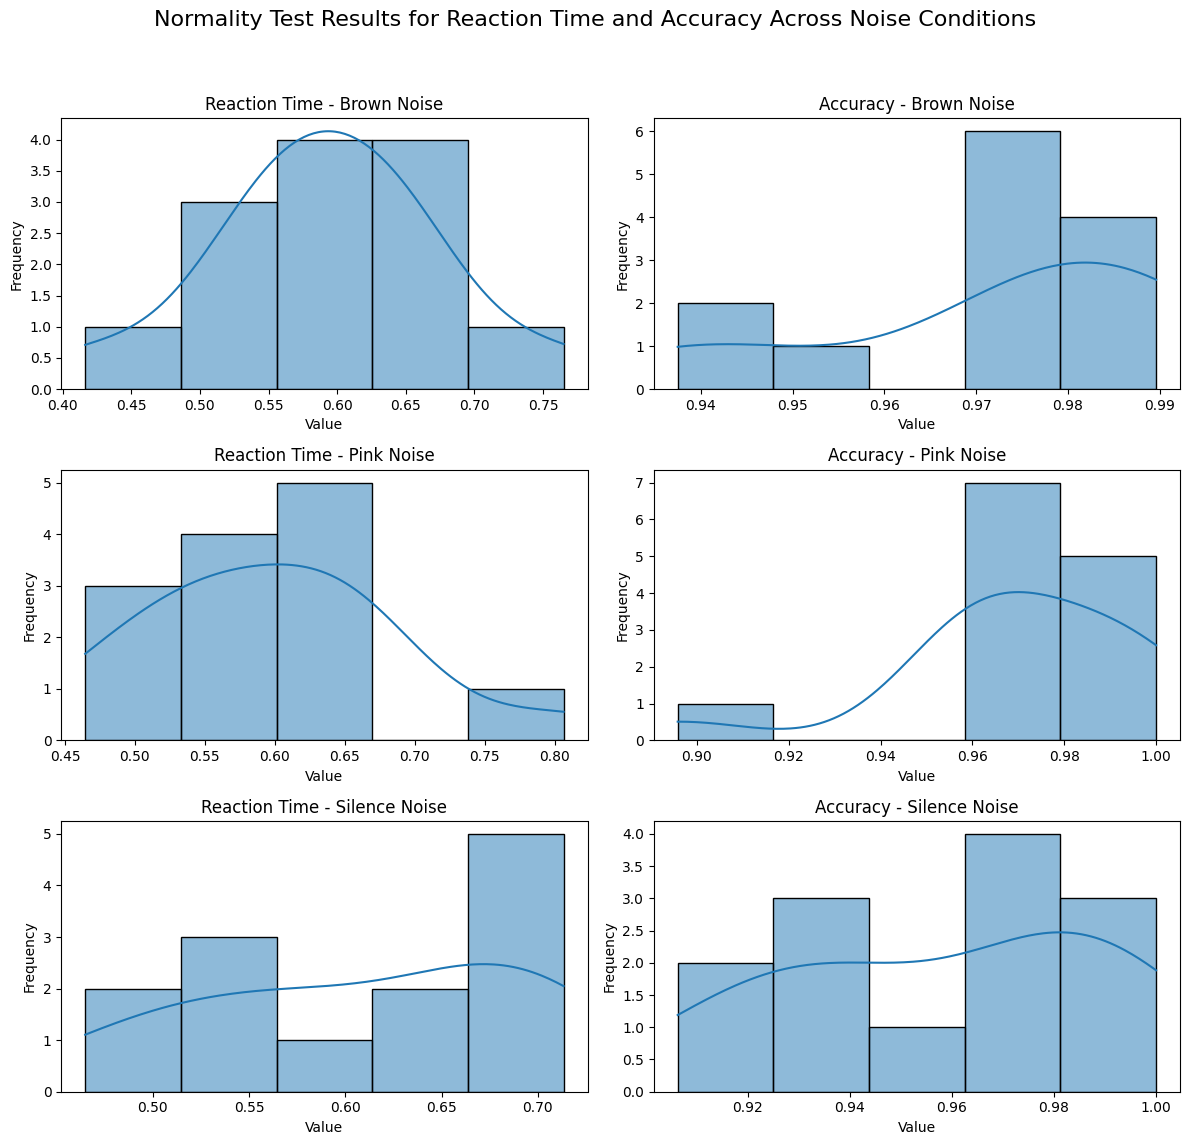

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating plots for normality test results
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle('Normality Test Results for Reaction Time and Accuracy Across Noise Conditions', fontsize=16)

# Plot settings
sessions = ['brown', 'pink', 'silence']
tests = ['reaction_time', 'accuracy']
titles = ['Reaction Time', 'Accuracy']

for i, session in enumerate(sessions):
    for j, test in enumerate(tests):
        # Selecting data for each session and test
        session_data = combined_data[combined_data['session'] == session]
        column = 'combined_mean_reaction_time' if test == 'reaction_time' else 'combined_accuracy'

        # Creating the plot
        sns.histplot(session_data[column], kde=True, ax=axes[i][j])
        axes[i][j].set_title(f'{titles[j]} - {session.capitalize()} Noise')
        axes[i][j].set_xlabel('Value')
        axes[i][j].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The Shapiro-Wilk tests for normality have been conducted on the combined reaction time and accuracy data for each session type (brown, pink, silence). Here are the results:

Brown Noise

Reaction Time: p-value = 0.8806 (normal distribution),
Accuracy: p-value = 0.0098 (not a normal distribution)

Pink Noise

Reaction Time: p-value = 0.6252 (normal distribution),
Accuracy: p-value = 0.0125 (not a normal distribution)

Silence

Reaction Time: p-value = 0.2766 (normal distribution),
Accuracy: p-value = 0.2838 (normal distribution)

Interpretation:

For reaction time, the data appears to be normally distributed for all three noise conditions as the p-values are greater than 0.05.
For accuracy, the data is not normally distributed for brown and pink noise conditions but is normal for the silence condition.
Given that the accuracy data does not meet the normality assumption for two out of three conditions, it would be appropriate to use a non-parametric test for this variable. For reaction time, we could proceed with a parametric test, but for consistency in the analysis approach, a non-parametric test could be considered for this variable as well.

In [12]:
from scipy.stats import friedmanchisquare

# Preparing data for the Friedman test
# Extracting reaction time and accuracy data for each session type for each participant
reaction_time_data = combined_data.pivot(index='participant', columns='session', values='combined_mean_reaction_time')
accuracy_data = combined_data.pivot(index='participant', columns='session', values='combined_accuracy')

# Performing Friedman tests
friedman_reaction_time = friedmanchisquare(reaction_time_data['brown'], 
                                           reaction_time_data['pink'], 
                                           reaction_time_data['silence'])

friedman_accuracy = friedmanchisquare(accuracy_data['brown'], 
                                       accuracy_data['pink'], 
                                       accuracy_data['silence'])

friedman_reaction_time, friedman_accuracy

(FriedmanchisquareResult(statistic=2.923076923076934, pvalue=0.2318792628481911),
 FriedmanchisquareResult(statistic=0.31111111111111617, pvalue=0.8559395234122631))

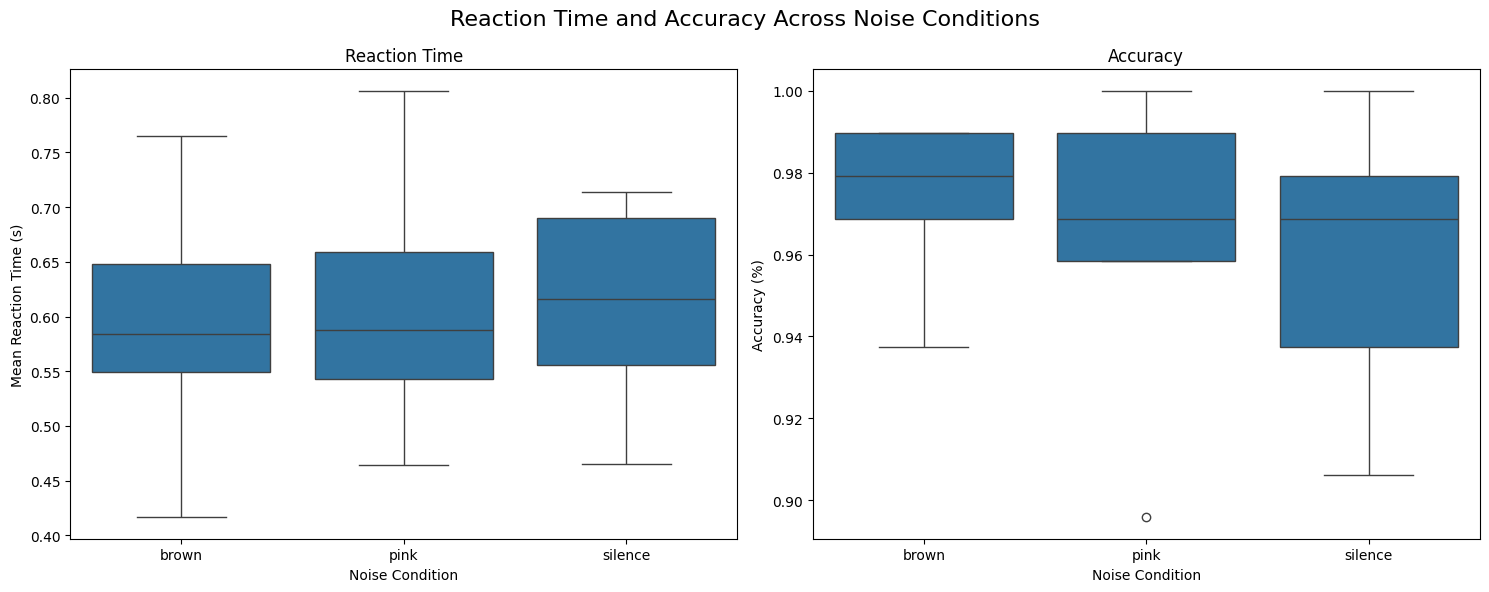

In [13]:
# Creating box plots to visually compare reaction time and accuracy across noise conditions

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Reaction Time and Accuracy Across Noise Conditions', fontsize=16)

# Reaction Time Box Plot
sns.boxplot(x='session', y='combined_mean_reaction_time', data=combined_data, ax=axes[0])
axes[0].set_title('Reaction Time')
axes[0].set_xlabel('Noise Condition')
axes[0].set_ylabel('Mean Reaction Time (s)')

# Accuracy Box Plot
sns.boxplot(x='session', y='combined_accuracy', data=combined_data, ax=axes[1])
axes[1].set_title('Accuracy')
axes[1].set_xlabel('Noise Condition')
axes[1].set_ylabel('Accuracy (%)')

plt.tight_layout()
plt.show()

The finding that there are no statistically significant differences in both reaction time and accuracy across the different noise conditions (brown, pink, silence) in your cognitive science experiment has several implications:

No Effect of Noise Conditions on Cognitive Performance:

The results suggest that the type of background noise (brown, pink, or silence) does not significantly impact the cognitive performance of participants in this specific setting, at least in terms of the measured parameters (reaction time and accuracy).
This could mean that these particular types of noise, or the absence thereof, do not influence the ability of participants to perform the tasks in a way that can be statistically detected with your current sample size and experimental design.

Interpretation of Statistical Significance:

A lack of statistical significance means that any observed differences in reaction time and accuracy across the noise conditions could be attributed to random chance rather than a systematic effect of the noise conditions.
Statistically, it implies that if the experiment were repeated numerous times with similar groups of participants, any differences in outcomes would likely vary randomly and not consistently favor one noise condition over the others.

Consideration of Experimental Design and Power:

These findings might also prompt a review of the experimental design. For instance, the sensitivity of the tests (1-back and 2-back) or the way noise conditions were implemented may not have been impactful enough to elicit measurable differences.
The sample size and variability within your data might not have provided enough power to detect a small but potentially meaningful effect.
Practical Implications:

In a practical sense, these findings might suggest that for the type of cognitive tasks used in your study (1-back and 2-back tests), participants' performance is relatively robust to these specific noise environments.
Further Research and Consideration:

It's important to consider these results in the context of existing literature and understand that they contribute to a broader understanding of how noise environments affect cognitive performance.
Further research could explore different types of noise, other cognitive tasks, or different populations to build a more comprehensive understanding of this phenomenon.   